In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data['stalk-surface-below-ring'][3]

's'

In [5]:
[data.columns]

[Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat'],
       dtype='object')]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
x=data['class'].map({'p':0,'e':1})
x

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [8]:
y=data.loc[:,data.columns!='class']
y=pd.get_dummies(y)
y.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
final={}
train_x, test_x, train_y, test_y= train_test_split(y,x,test_size=0.4, random_state=10)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4874, 117), (3250, 117), (4874,), (3250,))

### LogisticRegression

In [11]:
model1= LogisticRegression()
param1={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model1_GCV= GridSearchCV(model1,param1, cv=10, verbose=0)
model1_GCV.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [12]:
model1_GCV.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [13]:
p1=model1_GCV.predict(test_x)

In [14]:
final[type(model1).__name__]=accuracy_score(p1, test_y)

In [15]:
accuracy_score(p1, test_y)

1.0

### RandomForestClassifier

In [16]:
model2= RandomForestClassifier()
param2={'criterion':['gini', 'entropy'],
        'n_estimators':[100,140,180,200,300],
        'max_depth':[1,2,3],
        'bootstrap':[True, False]
       }
model2_GCV= GridSearchCV(model2,param2, cv=10, verbose=0)
model2_GCV.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 140, 180, 200, 300]})

In [17]:
model2_GCV.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=3, n_estimators=300)

In [18]:
p2=model2_GCV.predict(test_x)

In [19]:
final[type(model2).__name__]=accuracy_score(p2, test_y)

In [20]:
accuracy_score(p2, test_y)

0.9901538461538462

### AdaBoostClassifier

In [21]:
model3= AdaBoostClassifier()
param3= {'base_estimator':[DecisionTreeClassifier(max_depth=1)],
         'n_estimators':[100,140,180,200,300],
         'learning_rate':[0.01, 0.1, 1, 10,100 ],
         'algorithm':['SAMME', 'SAMME.R']
        }
model3_GCV= GridSearchCV(model3,param3, cv=10, verbose=0)
model3_GCV.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(max_depth=1)],
                         'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 140, 180, 200, 300]})

In [22]:
model3_GCV.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100)

In [23]:
p3=model3_GCV.predict(test_x)
final[type(model3).__name__]=accuracy_score(p3, test_y)
accuracy_score(p3, test_y)

1.0

### GradientBoostingClassifier

In [24]:
model4 =GradientBoostingClassifier()
param4= {'max_depth':[1,2,3],
         'n_estimators':[100,140,180,200,300],
         'learning_rate':[0.01, 0.1, 1, 10,100 ]
        }
model4_GCV= GridSearchCV(model4,param4, cv=10, verbose=0)
model4_GCV.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 140, 180, 200, 300]})

In [25]:
model4_GCV.best_estimator_

GradientBoostingClassifier(max_depth=2, n_estimators=300)

In [26]:
p4=model4_GCV.predict(test_x)
final[type(model4).__name__]=accuracy_score(p4, test_y)
accuracy_score(p4, test_y)

1.0

 ### SVC

In [27]:
model5= SVC()
param5= {'C':[0.05,0.1,1,10,100],
         'gamma':[0.05,0.1,1,10,100]
        }
model5_GCV= GridSearchCV(model5,param5, cv=10, verbose=0)
model5_GCV.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 1, 10, 100],
                         'gamma': [0.05, 0.1, 1, 10, 100]})

In [28]:
model5_GCV.best_estimator_

SVC(C=1, gamma=0.05)

In [29]:
p5=model5_GCV.predict(test_x)
final[type(model5).__name__]=accuracy_score(p5, test_y)
accuracy_score(p5, test_y)

1.0

### KNeighborsClassifier

In [30]:
model6=KNeighborsClassifier()
model6.fit(train_x, train_y)


KNeighborsClassifier()

In [31]:
p6=model6.predict(test_x)
final[type(model6).__name__]=accuracy_score(p6, test_y)
accuracy_score(p6, test_y)

1.0

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
final

{'LogisticRegression': 1.0,
 'RandomForestClassifier': 0.9901538461538462,
 'AdaBoostClassifier': 1.0,
 'GradientBoostingClassifier': 1.0,
 'SVC': 1.0,
 'KNeighborsClassifier': 1.0}

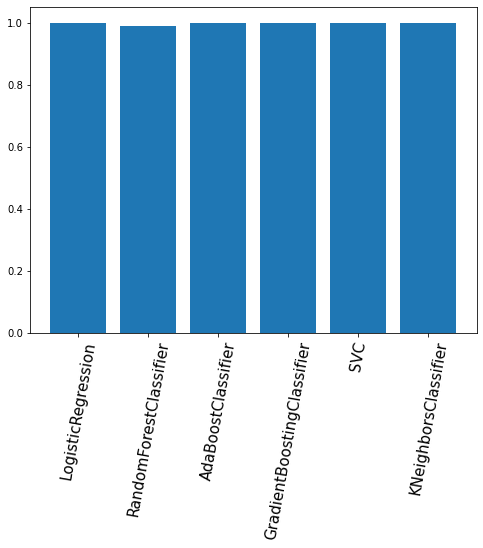

In [34]:
plt.figure(figsize=[8,6])
plt.bar(final.keys(), final.values())
plt.xticks(rotation=80,fontsize=15);

In [35]:
final

{'LogisticRegression': 1.0,
 'RandomForestClassifier': 0.9901538461538462,
 'AdaBoostClassifier': 1.0,
 'GradientBoostingClassifier': 1.0,
 'SVC': 1.0,
 'KNeighborsClassifier': 1.0}